In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
clean_data = Path("../Resources/clean_data.csv")
clean_data_df = pd.read_csv(clean_data)

clean_data_df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Data Scientist,239900,USD,239900,US,100,US,M
1,2023,SE,FT,Data Scientist,159900,USD,159900,US,100,US,M
2,2023,EN,FT,Data Analyst,162240,USD,162240,US,0,US,M
3,2023,EN,FT,Data Analyst,47840,USD,47840,US,0,US,M
4,2023,SE,FT,Data Engineer,130410,USD,130410,US,0,US,M
5,2023,SE,FT,Data Engineer,92000,USD,92000,US,0,US,M
6,2023,SE,FT,Data Science,270250,USD,270250,US,0,US,M
7,2023,SE,FT,Data Science,144000,USD,144000,US,0,US,M
8,2023,SE,FT,Business Intelligence Analyst,176875,USD,176875,US,0,US,M
9,2023,SE,FT,Business Intelligence Analyst,84750,USD,84750,US,0,US,M


In [3]:
#Determine the number of unique job titles
job_titles_count = clean_data_df['job_title'].nunique()
job_titles_count

85

In [4]:
#Group data by level of remote work
grouped_data = clean_data_df.groupby('remote_ratio')['job_title'].unique()
grouped_data

remote_ratio
0      [Data Analyst, Data Engineer, Data Science, Bu...
50     [Business Data Analyst, Marketing Data Scienti...
100    [Data Scientist, Data Engineer, Machine Learni...
Name: job_title, dtype: object

In [5]:
#Determine number of jobs in each level of remote work
remote_level_counts = clean_data_df['remote_ratio'].value_counts()
remote_level_counts

remote_ratio
0      5089
100    2261
50       11
Name: count, dtype: int64

In [6]:
# Group by 'remote_ratio' and 'job_title', then count the occurrences
count_df = clean_data_df.groupby(['remote_ratio', 'job_title']).size().reset_index(name='count_title_remote_work')

# Find the five job titles with the most counts for each remote ratio
top_titles_per_remote_ratio = count_df.groupby('remote_ratio').apply(lambda x: x.nlargest(5, 'count_title_remote_work')).reset_index(drop=True)

# Group by 'remote_ratio' and 'job_title', then calculate the mean salary
average_salary_df = clean_data_df.groupby(['remote_ratio', 'job_title'])['salary'].mean().reset_index()

# Merge the DataFrames on 'remote_ratio' and 'job_title'
result_df = pd.merge(top_titles_per_remote_ratio, average_salary_df, on=['remote_ratio', 'job_title'], how='left')

# Pivot the DataFrame
result_pivoted_df = result_df.pivot_table(index='job_title', columns='remote_ratio', values='salary', aggfunc='mean', fill_value=0)

# Rename the columns
result_pivoted_df.columns = [f'{col}_remote_ratio' for col in result_pivoted_df.columns]

# Reset the index
result_pivoted_df = result_pivoted_df.reset_index()

# Round the average salary columns
result_pivoted_df[['0_remote_ratio', '50_remote_ratio', '100_remote_ratio']] = result_pivoted_df[['0_remote_ratio', '50_remote_ratio', '100_remote_ratio']].round()

# Rename columns
result_pivoted_df.rename(columns = {'job_title':'Job Title',
                                    '0_remote_ratio':'No Remote Work',
                                   '50_remote_ratio':'Partially Remote/Hybrid', 
                                    '100_remote_ratio':'Fully Remote'}, inplace = True)

result_pivoted_df

,Job Title,No Remote Work,Partially Remote/Hybrid,Fully Remote
0,Business Data Analyst,0.0,99500,0.0
1,Data Analyst,113976.0,100000,112227.0
2,Data Architect,0.0,0,176954.0
3,Data Engineer,155531.0,90000,156317.0
4,Data Scientist,171337.0,110000,168605.0
5,Machine Learning Engineer,196193.0,177000,192086.0
6,Research Scientist,191260.0,0,0.0


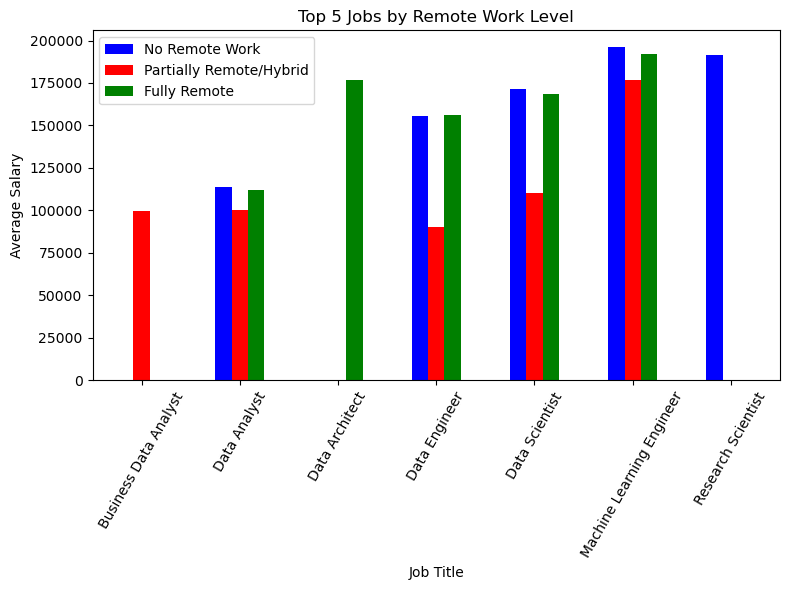

In [7]:
result_pivoted_df.set_index('Job Title').plot.bar(color={'No Remote Work': 'blue',
                                                         'Partially Remote/Hybrid': 'red', 
                                                         'Fully Remote': 'green'}, 
                                                  rot = 60,
                                                 figsize=(8, 6))

plt.title('Top 5 Jobs by Remote Work Level')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')

plt.tight_layout()

# Save the figure
plt.savefig("Top_5_Avg_Salary_by_Remote_Ratio_Comparison.png")

plt.show()

In [8]:
# Group by 'remote_ratio' and 'job_title', count occurrences, and reset the index
grouped_size_data = clean_data_df.groupby(['remote_ratio', 'job_title']).size().reset_index(name='count')

# Find the top 5 job titles for each level of remote work
top_job_titles = grouped_size_data.sort_values(by='count', ascending=False).groupby('remote_ratio').head(5).reset_index(drop=True)

# Merge with the original DataFrame to get additional information
result_df = pd.merge(top_job_titles, clean_data_df, on=['remote_ratio', 'job_title'], how='inner')

# Display or use the resulting DataFrame as needed
result_df


,remote_ratio,job_title,count,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,employee_residence,company_location,company_size
0,0,Data Engineer,1152,2023,SE,FT,130410,USD,130410,US,US,M
1,0,Data Engineer,1152,2023,SE,FT,92000,USD,92000,US,US,M
2,0,Data Engineer,1152,2023,SE,FT,130410,USD,130410,US,US,M
3,0,Data Engineer,1152,2023,SE,FT,92000,USD,92000,US,US,M
4,0,Data Engineer,1152,2023,SE,FT,333500,USD,333500,US,US,M
...,...,...,...,...,...,...,...,...,...,...,...,...
5355,50,Machine Learning Engineer,2,2023,MI,FT,135000,USD,135000,US,US,L
5356,50,Machine Learning Engineer,2,2023,MI,FT,219000,USD,219000,US,US,L
5357,50,Data Analyst,1,2023,EN,FT,100000,USD,100000,US,US,M
5358,50,Product Data Analyst,1,2023,EN,CT,83200,USD,83200,US,US,S


In [9]:
average_salaries_job_title = result_df.groupby(['remote_ratio', 'job_title'])['salary'].mean().reset_index(name='avg_salary_by_job_title')
average_salaries_job_title

,remote_ratio,job_title,avg_salary_by_job_title
0,0,Data Analyst,113975.991974
1,0,Data Engineer,155530.512153
2,0,Data Scientist,171337.408898
3,0,Machine Learning Engineer,196193.050898
4,0,Research Scientist,191260.377193
5,50,Business Data Analyst,99500.000000
6,50,Data Analyst,100000.000000
7,50,Data Engineer,90000.000000
8,50,Machine Learning Engineer,177000.000000
9,50,Product Data Analyst,83200.000000


In [10]:
remote_job_title_counts = result_df.groupby(['remote_ratio', 'job_title']).size().reset_index(name='value_counts')
remote_job_title_counts

,remote_ratio,job_title,value_counts
0,0,Data Analyst,623
1,0,Data Engineer,1152
2,0,Data Scientist,944
3,0,Machine Learning Engineer,668
4,0,Research Scientist,228
5,50,Business Data Analyst,2
6,50,Data Analyst,1
7,50,Data Engineer,1
8,50,Machine Learning Engineer,2
9,50,Product Data Analyst,1


In [11]:
count_grouped_data = clean_data_df.groupby(['remote_ratio', 'job_title']).size().reset_index(name='job_title_count')

total_counts = count_grouped_data.groupby('remote_ratio')['job_title_count'].sum().reset_index(name='total_job_title_count')
total_counts

,remote_ratio,total_job_title_count
0,0,5089
1,50,11
2,100,2261


In [12]:
no_remote_work_df = clean_data_df.loc[(clean_data_df['remote_ratio'] == 0) & (clean_data_df['experience_level'] == 'EN')]

top_five_counts = no_remote_work_df.groupby('job_title').size().reset_index(name='count_titles')

# Sort the data to find the top 5 job titles
top_five_jobs = top_five_counts.groupby('job_title').apply(lambda x: x.nlargest(5, 'count_titles')).reset_index(drop=True)

# Group by job title and experience level, then calculate the mean salary
avg_salary_title_df = no_remote_work_df.groupby(['job_title'])['salary'].mean().reset_index()

# Round the average salary columns
avg_salary_title_df['salary'] = avg_salary_title_df['salary'].round()

# Merge the DataFrames on 'remote_ratio' and 'job_title'
new_df = pd.merge(top_five_jobs, avg_salary_title_df, on=['job_title'], how='left')

# Pivot the DataFrame
new_pivoted_df = new_df.pivot_table(index='job_title', values='salary', aggfunc='mean', fill_value=0)

# Reset the index
new_pivoted_df = new_pivoted_df.reset_index()

new_pivoted_df

,job_title,salary
0,Analytics Engineer,87000
1,Applied Scientist,178368
2,BI Developer,100650
3,Business Intelligence Analyst,85235
4,Computer Vision Engineer,220000
5,Data Analyst,88711
6,Data Engineer,106860
7,Data Management Analyst,85000
8,Data Manager,117700
9,Data Scientist,108459


In [13]:
partial_remote_work_df = clean_data_df.loc[clean_data_df['remote_ratio'] == 50]
partial_remote_work_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
394,2023,SE,FT,Business Data Analyst,94000,USD,94000,US,50,US,L
529,2023,SE,FT,Marketing Data Scientist,90000,USD,90000,US,50,US,L
1952,2023,EN,FT,Financial Data Analyst,56500,USD,56500,US,50,US,L
3403,2023,EN,FT,Data Engineer,90000,USD,90000,US,50,CA,L
5517,2023,EN,CT,Product Data Analyst,83200,USD,83200,US,50,US,S


In [14]:
fully_remote_work_df = clean_data_df.loc[clean_data_df['remote_ratio'] == 100]
fully_remote_work_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Data Scientist,239900,USD,239900,US,100,US,M
1,2023,SE,FT,Data Scientist,159900,USD,159900,US,100,US,M
34,2023,SE,FT,Data Engineer,178492,USD,178492,US,100,US,M
35,2023,SE,FT,Data Engineer,89246,USD,89246,US,100,US,M
36,2023,SE,FT,Data Engineer,245000,USD,245000,US,100,US,M


In [15]:
# Group by job title and experience level
grouped_exp_lvl_no_remote = no_remote_work_df.groupby(['job_title', 'experience_level']).size().reset_index(name='count_title_exp_level')

# Sort the data to find the top 5 job titles for each experience level
top_five_by_experience = grouped_exp_lvl_no_remote.groupby('experience_level').apply(lambda x: x.nlargest(5, 'count_title_exp_level')).reset_index(drop=True)

# Group by job title and experience level, then calculate the mean salary
avg_salary_title_exp_lvl_df = no_remote_work_df.groupby(['job_title', 'experience_level'])['salary'].mean().reset_index()

# Round the average salary columns
avg_salary_title_exp_lvl_df['salary'] = avg_salary_title_exp_lvl_df['salary'].round()

# Merge the DataFrames on 'remote_ratio' and 'job_title'
exp_result_df = pd.merge(top_five_by_experience, avg_salary_title_exp_lvl_df, on=['job_title', 'experience_level'], how='left')

# Pivot the DataFrame
exp_result_pivoted_df = exp_result_df.pivot_table(index='job_title', columns='experience_level', values='salary', aggfunc='mean', fill_value=0)

# Reset the index
exp_result_pivoted_df = exp_result_pivoted_df.reset_index()

# Rename columns
exp_result_pivoted_df.rename(columns = {'job_title':'Job Title',
                                    'EN':'Entry-level',
                                    'MI':'Mid-level',
                                    'SE':'Senior-level',
                                    'EX':'Executive-level'}, inplace = True)
exp_result_pivoted_df

experience_level,Job Title,Entry-level
0,Data Analyst,88711
1,Data Engineer,106860
2,Data Scientist,108459
3,Research Engineer,156938
4,Research Scientist,154982


In [16]:
entry_lvl_no_remote_work_df = exp_result_pivoted_df.loc[exp_result_pivoted_df['Entry-level'] > 0]
entry_lvl_no_remote_work_df

experience_level,Job Title,Entry-level
0,Data Analyst,88711
1,Data Engineer,106860
2,Data Scientist,108459
3,Research Engineer,156938
4,Research Scientist,154982


In [17]:
entry_remote_work_df = entry_lvl_no_remote_work_df[['Job Title', 'Entry-level']].copy()
entry_remote_work_df

experience_level,Job Title,Entry-level
0,Data Analyst,88711
1,Data Engineer,106860
2,Data Scientist,108459
3,Research Engineer,156938
4,Research Scientist,154982


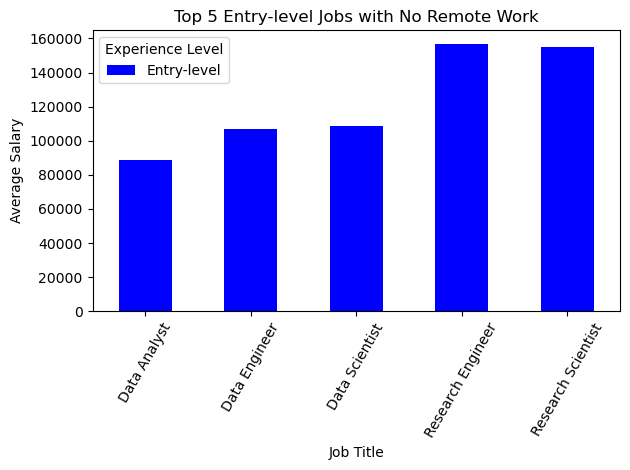

In [18]:
entry_remote_work_df.set_index('Job Title').plot.bar(color={'Entry-level': 'blue'}, rot = 60)

plt.title('Top 5 Entry-level Jobs with No Remote Work')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.legend(['Entry-level'], loc='upper left', title='Experience Level')

plt.tight_layout()

# Save the figure
plt.savefig("Top_5_Avg_Salary_by_Exp_Level_No_Remote.png")

plt.show()

In [19]:
# Group by job title and experience level
grouped_exp_lvl_data = fully_remote_work_df.groupby(['job_title', 'experience_level']).size().reset_index(name='count_title_exp_level')

# Sort the data to find the top 5 job titles for each experience level
top_five_by_experience = grouped_exp_lvl_data.groupby('experience_level').apply(lambda x: x.nlargest(5, 'count_title_exp_level')).reset_index(drop=True)

# Group by job title and experience level, then calculate the mean salary
avg_salary_title_exp_lvl_df = fully_remote_work_df.groupby(['job_title', 'experience_level'])['salary'].mean().reset_index()

# Round the average salary columns
avg_salary_title_exp_lvl_df['salary'] = avg_salary_title_exp_lvl_df['salary'].round()

# Merge the DataFrames on 'remote_ratio' and 'job_title'
exp_result_df = pd.merge(top_five_by_experience, avg_salary_title_exp_lvl_df, on=['job_title', 'experience_level'], how='left')

# Pivot the DataFrame
exp_result_pivoted_df = exp_result_df.pivot_table(index='job_title', columns='experience_level', values='salary', aggfunc='mean', fill_value=0)

# Reset the index
exp_result_pivoted_df = exp_result_pivoted_df.reset_index()

# Rename columns
exp_result_pivoted_df.rename(columns = {'job_title':'Job Title',
                                    'EN':'Entry-level',
                                    'MI':'Mid-level',
                                    'SE':'Senior-level',
                                    'EX':'Executive-level'}, inplace = True)
exp_result_pivoted_df

experience_level,Job Title,Entry-level,Executive-level,Mid-level,Senior-level
0,Data Analyst,79392,113333,90445,122538
1,Data Architect,0,0,0,179950
2,Data Engineer,73809,220822,124076,160409
3,Data Integration Specialist,94342,0,0,0
4,Data Scientist,109111,190450,133015,174001
5,Director of Data Science,0,230405,0,0
6,Head of Data,0,279743,0,0
7,Machine Learning Engineer,0,0,156639,197506
8,Research Analyst,62738,0,0,0
9,Research Scientist,0,0,180126,0


In [20]:
entry_lvl_remote_work_df = exp_result_pivoted_df.loc[exp_result_pivoted_df['Entry-level'] > 0]
entry_lvl_remote_work_df

experience_level,Job Title,Entry-level,Executive-level,Mid-level,Senior-level
0,Data Analyst,79392,113333,90445,122538
2,Data Engineer,73809,220822,124076,160409
3,Data Integration Specialist,94342,0,0,0
4,Data Scientist,109111,190450,133015,174001
8,Research Analyst,62738,0,0,0


In [21]:
entry_remote_work_df = entry_lvl_remote_work_df[['Job Title', 'Entry-level']].copy()
entry_remote_work_df

experience_level,Job Title,Entry-level
0,Data Analyst,79392
2,Data Engineer,73809
3,Data Integration Specialist,94342
4,Data Scientist,109111
8,Research Analyst,62738


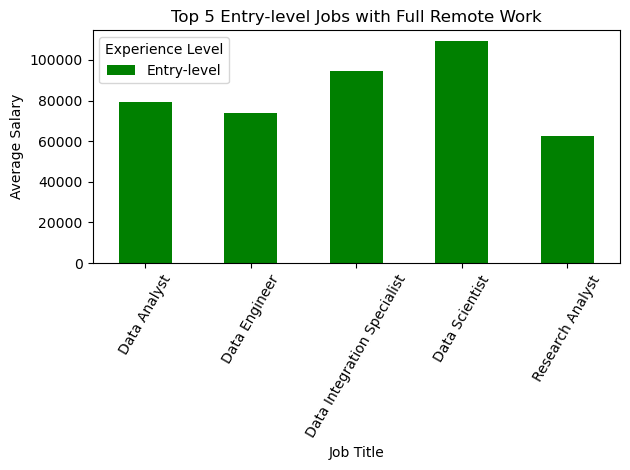

In [22]:
entry_remote_work_df.set_index('Job Title').plot.bar(color={'Entry-level': 'green'}, rot = 60)

plt.title('Top 5 Entry-level Jobs with Full Remote Work')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.legend(['Entry-level'], loc='upper left', title='Experience Level')

plt.tight_layout()

# Save the figure
plt.savefig("Top_5_Avg_Salary_by_Exp_Level_Fully_Remote.png")

plt.show()

In [23]:
# Group by job title and experience level
grouped_exp_lvl_data = partial_remote_work_df.groupby(['job_title', 'experience_level']).size().reset_index(name='count_title_exp_level')

# Sort the data to find the top 5 job titles for each experience level
top_five_by_experience = grouped_exp_lvl_data.groupby('experience_level').apply(lambda x: x.nlargest(5, 'count_title_exp_level')).reset_index(drop=True)

# Group by job title and experience level, then calculate the mean salary
avg_salary_title_exp_lvl_df = partial_remote_work_df.groupby(['job_title', 'experience_level'])['salary'].mean().reset_index()

# Round the average salary columns
avg_salary_title_exp_lvl_df['salary'] = avg_salary_title_exp_lvl_df['salary'].round()

# Merge the DataFrames on 'remote_ratio' and 'job_title'
exp_result_df = pd.merge(top_five_by_experience, avg_salary_title_exp_lvl_df, on=['job_title', 'experience_level'], how='left')

# Pivot the DataFrame
exp_result_pivoted_df = exp_result_df.pivot_table(index='job_title', columns='experience_level', values='salary', aggfunc='mean', fill_value=0)

# Reset the index
exp_result_pivoted_df = exp_result_pivoted_df.reset_index()

# Rename columns
exp_result_pivoted_df.rename(columns = {'job_title':'Job Title',
                                    'EN':'Entry-level',
                                    'MI':'Mid-level',
                                    'SE':'Senior-level',
                                    'EX':'Executive-level'}, inplace = True)
exp_result_pivoted_df

experience_level,Job Title,Entry-level,Mid-level,Senior-level
0,Business Data Analyst,0,105000,94000
1,Data Analyst,100000,0,0
2,Data Engineer,90000,0,0
3,Data Scientist,110000,0,0
4,Financial Data Analyst,56500,0,0
5,Machine Learning Engineer,0,177000,0
6,Marketing Data Scientist,0,0,90000
7,Product Data Analyst,83200,0,0


In [24]:
entry_lvl_remote_work_df = exp_result_pivoted_df.loc[exp_result_pivoted_df['Entry-level'] > 0]
entry_lvl_remote_work_df

experience_level,Job Title,Entry-level,Mid-level,Senior-level
1,Data Analyst,100000,0,0
2,Data Engineer,90000,0,0
3,Data Scientist,110000,0,0
4,Financial Data Analyst,56500,0,0
7,Product Data Analyst,83200,0,0


In [25]:
entry_remote_work_df = entry_lvl_remote_work_df[['Job Title', 'Entry-level']].copy()
entry_remote_work_df

experience_level,Job Title,Entry-level
1,Data Analyst,100000
2,Data Engineer,90000
3,Data Scientist,110000
4,Financial Data Analyst,56500
7,Product Data Analyst,83200


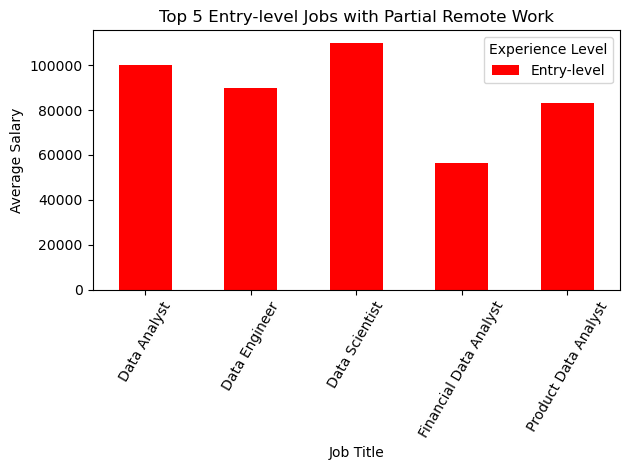

In [26]:
entry_remote_work_df.set_index('Job Title').plot.bar(color={'Entry-level': 'red'}, rot = 60)

plt.title('Top 5 Entry-level Jobs with Partial Remote Work')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.legend(['Entry-level'], loc='upper right', title='Experience Level')

plt.tight_layout()

# Save the figure
plt.savefig("Top_5_Avg_Salary_by_Exp_Level_Partial_Remote.png")

plt.show()